## Google PlayStore EDA (Exploratory Data Analysis)

## What is Exploratory Data Analysis?
Exploratory data analysis (EDA) is used by data scientists to analyze and investigate data sets for patterns, and anomalies (outliers), and form hypotheses based on our understanding of the dataset and summarize their main characteristics, often employing data visualization methods. It is an important step in any Data Analysis or Data Science project. It helps determine how best to manipulate data sources to get the answers you need.

EDA involves generating summary statistics for numerical data in the dataset and creating various graphical representations to understand the data better and make it more attractive and appealing.

## Introduction
Google Play Store or formerly Android Market, is a digital distribution service developed and operated by Google. It is an official apps store that provides variety content such as apps, books, magazines, music, movies and television programs. It serves an as platform to allow users with 'Google certified' Android operating system devices to donwload applications developed and published on the platform either with a charge or free of cost. With the rapidly growth of Android devices and apps, it would be interesting to perform data analysis on the data to obtain valuable insights.

The dataset that is going to be used is 'Google Play Store Apps' from Kaggle. It contains 10k of web scraped Play Store apps data for analysing the Android market. The tools that are going to be used for this EDA would be numpy, pandas, matplotlib and seaborn which I have learnt from the course.

Apps dataset columns descriptions:

This file contains all the details of the apps on Google Play. There are 9 features that describe a given app.

- App: Name of the app
- Category: Category of the app. Some examples are: ART_AND_DESIGN, FINANCE, COMICS, BEAUTY etc.
- Rating: The current average rating (out of 5) of the app on Google Play
- Reviews: Number of user reviews given on the app
- Size: Size of the app in MB (megabytes)
- Installs: Number of times the app was downloaded from Google Play
- Type: Whether the app is paid or free
- Price: Price of the app in US$
- Last Updated: Date on which the app was last updated on Google Play

Process:
- Loading the dataset
- Understanding the dataset
- Handling missing data
- Data preprocessing
- Data visualization

## Data Preparation and Cleaning
In this section, we will be loading the Google Store Apps data stored in csv using pandas which is a fast and powerful python library for data analysis and easy data manipulation in pandas DataFrame object. It is usually used for working with tabular data (e.g data in spreadsheet) in various formats such as CSV, Excel spreadsheets, HTML tables, JSON etc. We will then perform some data preparation and also cleaning on it.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [3]:
## Dimensions of dataset
df.shape

(10841, 13)

There are total 10841 rows and 13 columns.

In [4]:
## Checking null values
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Observations: 

- There is huge amount of missing values in 'Rating' feature : 1474\
The 'Rating' feature is crucial for understanding user satisfaction and app quality. Having a large number of missing ratings can skew any analysis that relies on app ratings, such as category-based comparisons or identifying top-rated categories.
- Some missing value in 'Type' : 1\
The 'Type' feature likely indicates whether an app is free or paid. A single missing value might not have a major impact.
- Some missing value in 'Content rating' : 1\
'Content Rating' provides information about the age appropriateness of apps. A single missing value might not have a major impact.
- Some missing values in 'Current Ver' : 8
- Some missing values in 'Android Ver' : 3\
The 'Current Ver' and 'Android Ver' features relate to app versions and compatibility. Missing values here might hinder understanding the relationship between app updates, compatibility, and user satisfaction.

In [5]:
#Preprocessing Of Data

In [6]:
## Checking Datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [54]:
## Standardize types - Some columns are in character type whereas they should be numeric or integer.

In [7]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [8]:
df['Reviews'].value_counts()

0         596
1         272
2         214
3         175
4         137
         ... 
342912      1
4272        1
5517        1
4057        1
398307      1
Name: Reviews, Length: 6002, dtype: int64

In [9]:
df['Reviews'].str.isnumeric().sum()

10840

In [10]:
df[-df['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [11]:
df_copy = df.copy()

In [12]:
df_copy = df_copy.drop(df_copy.index[10472])

In [13]:
df_copy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [14]:
df_copy['Reviews'] = df_copy['Reviews'].astype(int)

In [15]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.2+ MB


In [16]:
df_copy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


## Data Transforming
From the information of data frame, we can see that all the columns except rating have the object data type but some of the columns like, reviews, size, installs and price have the numerical value. So, we have to transform them in proper data type and also remove the unwanted values from the numerical columns like ‘+’ and ‘,’ from installs and ‘$’ from price. In the size column we have some values in KB and some values in MB, so we transform all the values in MB.

In [17]:
df_copy['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [18]:
df_copy['Size'] = df_copy['Size'].str.replace('M', '000')
df_copy['Size'] = df_copy['Size'].str.replace('k', '')
df_copy['Size'] = df_copy['Size'].replace('Varies with device', np.nan)

df_copy['Size'] = df_copy['Size'].astype(float)

In [19]:
df_copy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [20]:
df_copy['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [21]:
df_copy['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [53]:
## Inside the dataset, there are values have included symbols. Hence, we do not want them in performing our analysis.

In [22]:
chars_to_remove = ['+', ',', '$']
cols_to_clean = ['Installs', 'Price']

for item in chars_to_remove:
    for cols in cols_to_clean:
        df_copy[cols] = df_copy[cols].str.replace(item,'')

In [23]:
df_copy['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [24]:
df_copy['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [25]:
df_copy['Installs'] = df_copy['Installs'].astype(int)
df_copy['Price'] = df_copy['Price'].astype(float)

In [26]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.2+ MB


In [27]:
df_copy['Last Updated']

0         January 7, 2018
1        January 15, 2018
2          August 1, 2018
3            June 8, 2018
4           June 20, 2018
               ...       
10836       July 25, 2017
10837        July 6, 2018
10838    January 20, 2017
10839    January 19, 2015
10840       July 25, 2018
Name: Last Updated, Length: 10840, dtype: object

In [28]:
df_copy['Last Updated'] = pd.to_datetime(df_copy['Last Updated'])

In [29]:
df_copy['Last Updated']

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 10840, dtype: datetime64[ns]

In [30]:
df_copy['Date'] = df_copy['Last Updated'].dt.day
df_copy['Month'] = df_copy['Last Updated'].dt.month
df_copy['Year'] = df_copy['Last Updated'].dt.year

In [31]:
df_copy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Date,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018


In [32]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  int64         
 4   Size            9145 non-null   float64       
 5   Installs        10840 non-null  int64         
 6   Type            10839 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10832 non-null  object        
 12  Android Ver     10838 non-null  object        
 13  Date            10840 non-null  int64         
 14  Month           10840 non-null  int64         
 15  Ye

In [33]:
df_copy[df_copy.duplicated('App')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Date,Month,Year
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,NaN,5000000,Free,0.0,Everyone,Business,2018-02-26,Varies with device,4.0.3 and up,26,2,2018
236,Box,BUSINESS,4.2,159872,NaN,10000000,Free,0.0,Everyone,Business,2018-07-31,Varies with device,Varies with device,31,7,2018
239,Google My Business,BUSINESS,4.4,70991,NaN,5000000,Free,0.0,Everyone,Business,2018-07-24,2.19.0.204537701,4.4 and up,24,7,2018
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37000.0,10000000,Free,0.0,Everyone,Business,2018-07-20,4.1.28165.0716,4.0 and up,20,7,2018
261,join.me - Simple Meetings,BUSINESS,4.0,6989,NaN,1000000,Free,0.0,Everyone,Business,2018-07-16,4.3.0.508,4.4 and up,16,7,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10715,FarmersOnly Dating,DATING,3.0,1145,1.4,100000,Free,0.0,Mature 17+,Dating,2016-02-25,2.2,4.0 and up,25,2,2016
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0,1000000,Free,0.0,Everyone,Communication,2018-07-06,5.2,5.0 and up,6,7,2018
10730,FP Notebook,MEDICAL,4.5,410,60000.0,50000,Free,0.0,Everyone,Medical,2018-03-24,2.1.0.372,4.4 and up,24,3,2018
10753,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599,12000.0,1000000,Free,0.0,Everyone,Shopping,2018-07-30,3.9,4.4 and up,30,7,2018


In [34]:
df_copy[df_copy.duplicated('App')].shape

(1181, 16)

Observation:
    
    The dataset has 1181 duplicate records

In [35]:
df_copy = df_copy.drop_duplicates(subset=['App'], keep='first')

In [36]:
df_copy[df_copy.duplicated('App')].shape

(0, 16)

In [37]:
numerical_features = [feature for feature in df_copy.columns if df_copy[feature].dtype != 'O']
categorical_features = [feature for feature in df_copy.columns if df_copy[feature].dtype == 'O']

print(f'We have {len(numerical_features)} numerical features: {numerical_features}')
print(f'We have {len(categorical_features)} categorical features: {categorical_features}')

We have 9 numerical features: ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Last Updated', 'Date', 'Month', 'Year']
We have 7 categorical features: ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']


In [38]:
df_copy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Date,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018


In [52]:
## Let’s take a look on all the category
df_copy.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

- So we got 33 category on this dataset

## Visualization

In [40]:
## kde or histplot for density plotting in numerical values

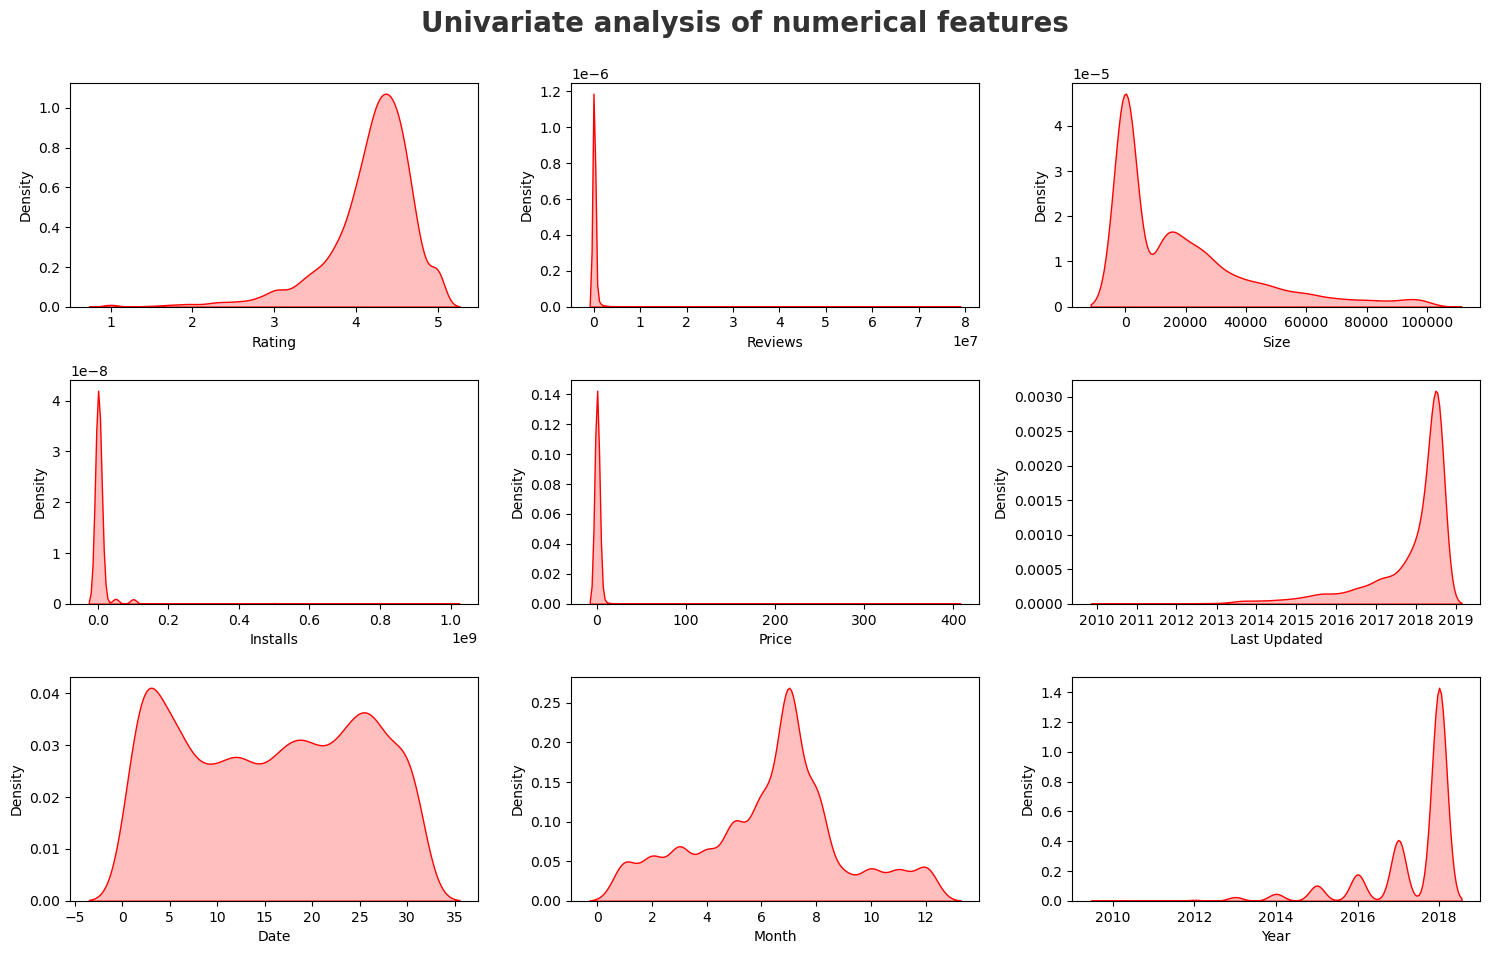

In [41]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate analysis of numerical features', fontsize=20, fontweight='bold', alpha=0.8, y=1)

for i in range(0, len(numerical_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(data=df_copy[numerical_features[i]], shade=True, color='r')
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

## observation

rating, last updated and year are left skewed and revews, size, installs, price are right skewed

In [42]:
## countplot for density plottting in categorical values

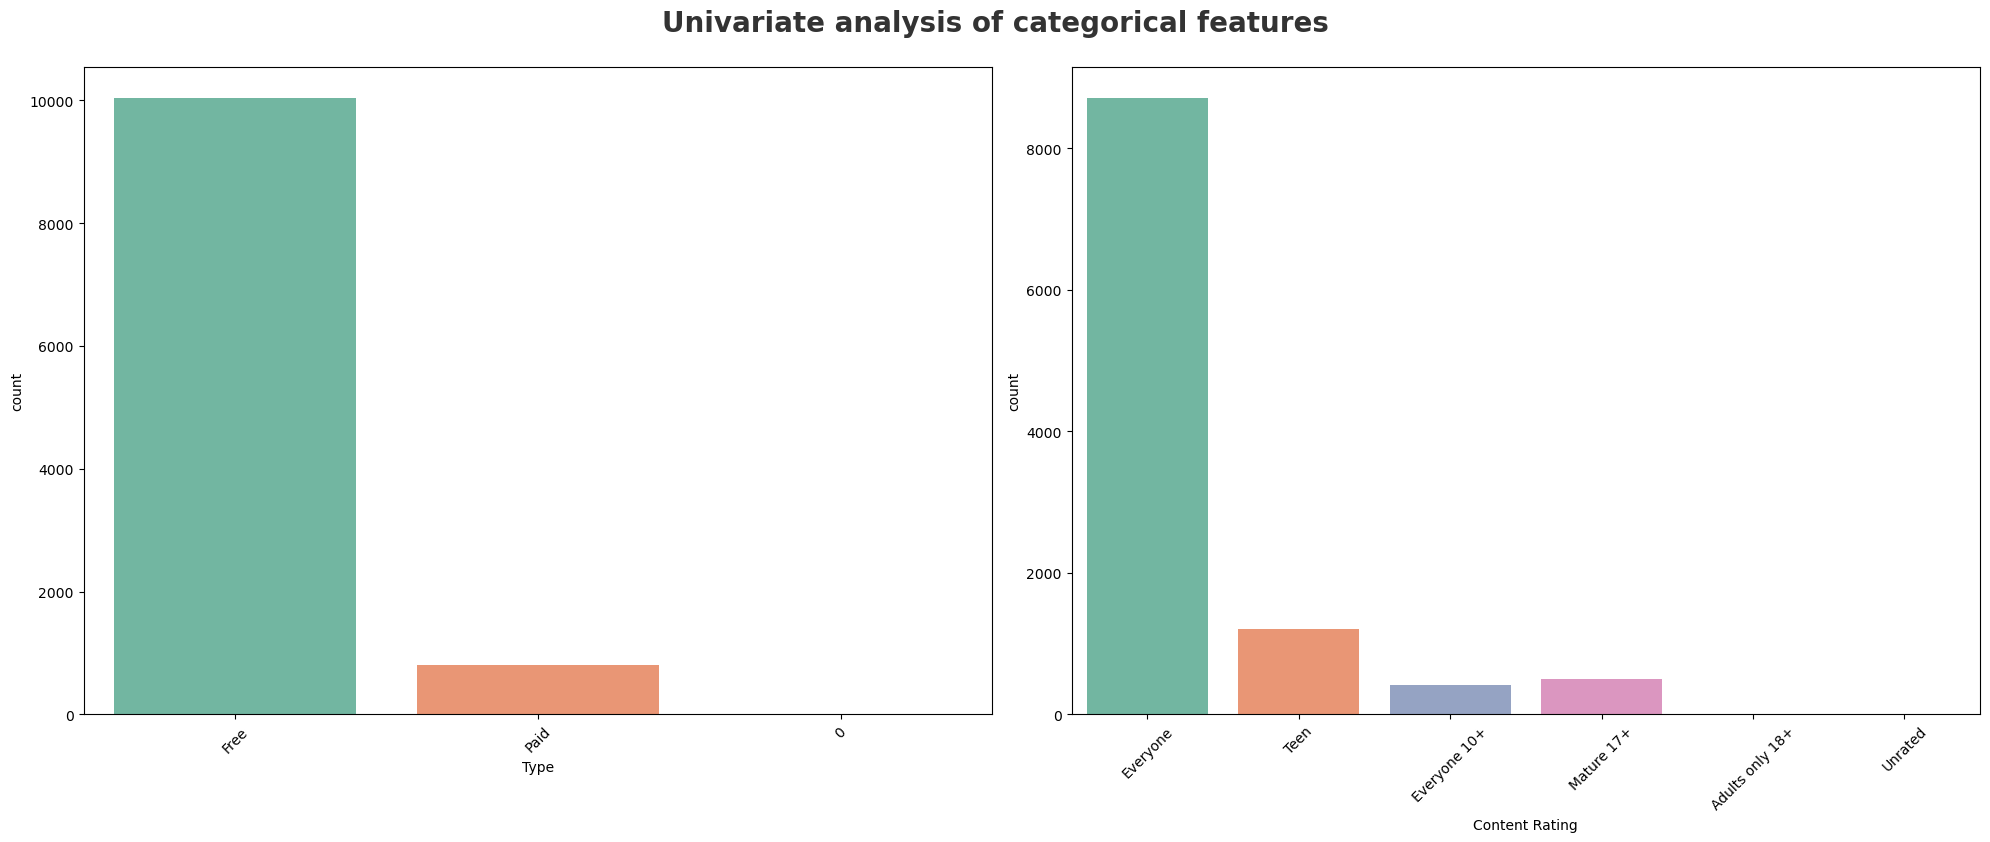

In [43]:
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate analysis of categorical features', fontsize=20, fontweight='bold', alpha=0.8, y=1)
category = ('Type', 'Content Rating')
for i in range(0, len(category)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[category[i]], palette='Set2')
    plt.xlabel(category[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

In [44]:
## most popular app category

In [45]:
df_copy['Category'].value_counts()

FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64

## Top 10 App categories

In [46]:
category = pd.DataFrame(df_copy['Category'].value_counts())
category.rename(columns={'Category': 'Count'}, inplace=True)

category

,Count
FAMILY,1832
GAME,959
TOOLS,827
BUSINESS,420
MEDICAL,395
PERSONALIZATION,376
PRODUCTIVITY,374
LIFESTYLE,369
FINANCE,345
SPORTS,325


In [47]:
## top 10 most popular apps in the dataset

In [48]:
df1 = df_copy.sort_values(by=['Installs'], ascending=False)
top_apps = df1.head(10)[['Installs', 'App']]

top_apps

,Installs,App
336,1000000000,WhatsApp Messenger
152,1000000000,Google Play Books
1654,1000000000,Subway Surfers
3117,1000000000,Maps - Navigate & Explore
340,1000000000,Gmail
2545,1000000000,Instagram
2544,1000000000,Facebook
338,1000000000,Google Chrome: Fast & Secure
2554,1000000000,Google+
3665,1000000000,YouTube


## identify the most popular app categories

Here's how we can approach this task:

1. Data Preparation:
Load the Google Play Store dataset into a suitable data structure (e.g., DataFrame if using Python and pandas).
Review the dataset's columns, data types, and any missing values.

2. Data Exploration:
Examine the unique values in the 'Category' column to understand the available app categories.
Check the 'Installs' column to understand the distribution of installs across different categories.
Explore other relevant columns like 'Rating', 'Reviews', and 'Price' to gather initial insights.

3. Category Popularity Analysis:
Calculate the total number of installs for each app category to determine their popularity.
Consider the number of installs as a proxy for popularity, as it indicates user engagement and interest.

4. Category Engagement Analysis:
Analyze user engagement within each category by calculating the average number of reviews, ratings. This provides insights into how actively users engage with apps in each category.

5. Visualizations:
Create bar charts or histograms to visualize the distribution of installs and ratings across different categories, to explore potential correlations between installs, ratings, and other features.

6. Top Categories Recommendation:
Identify the top app categories based on high total installs, active engagement (average reviews), and possibly high ratings.

7. Monetization Strategy:
Consider the pricing strategy for the new app. Analyze how the pricing structure (free, paid) affects popularity within the top categories.

8. Recommendation and Strategy:
Summarize the findings and provide recommendations to the company based on the analysis.
Suggest the top categories to consider for the new app launch, along with insights on user engagement, competition, and potential monetization strategies.

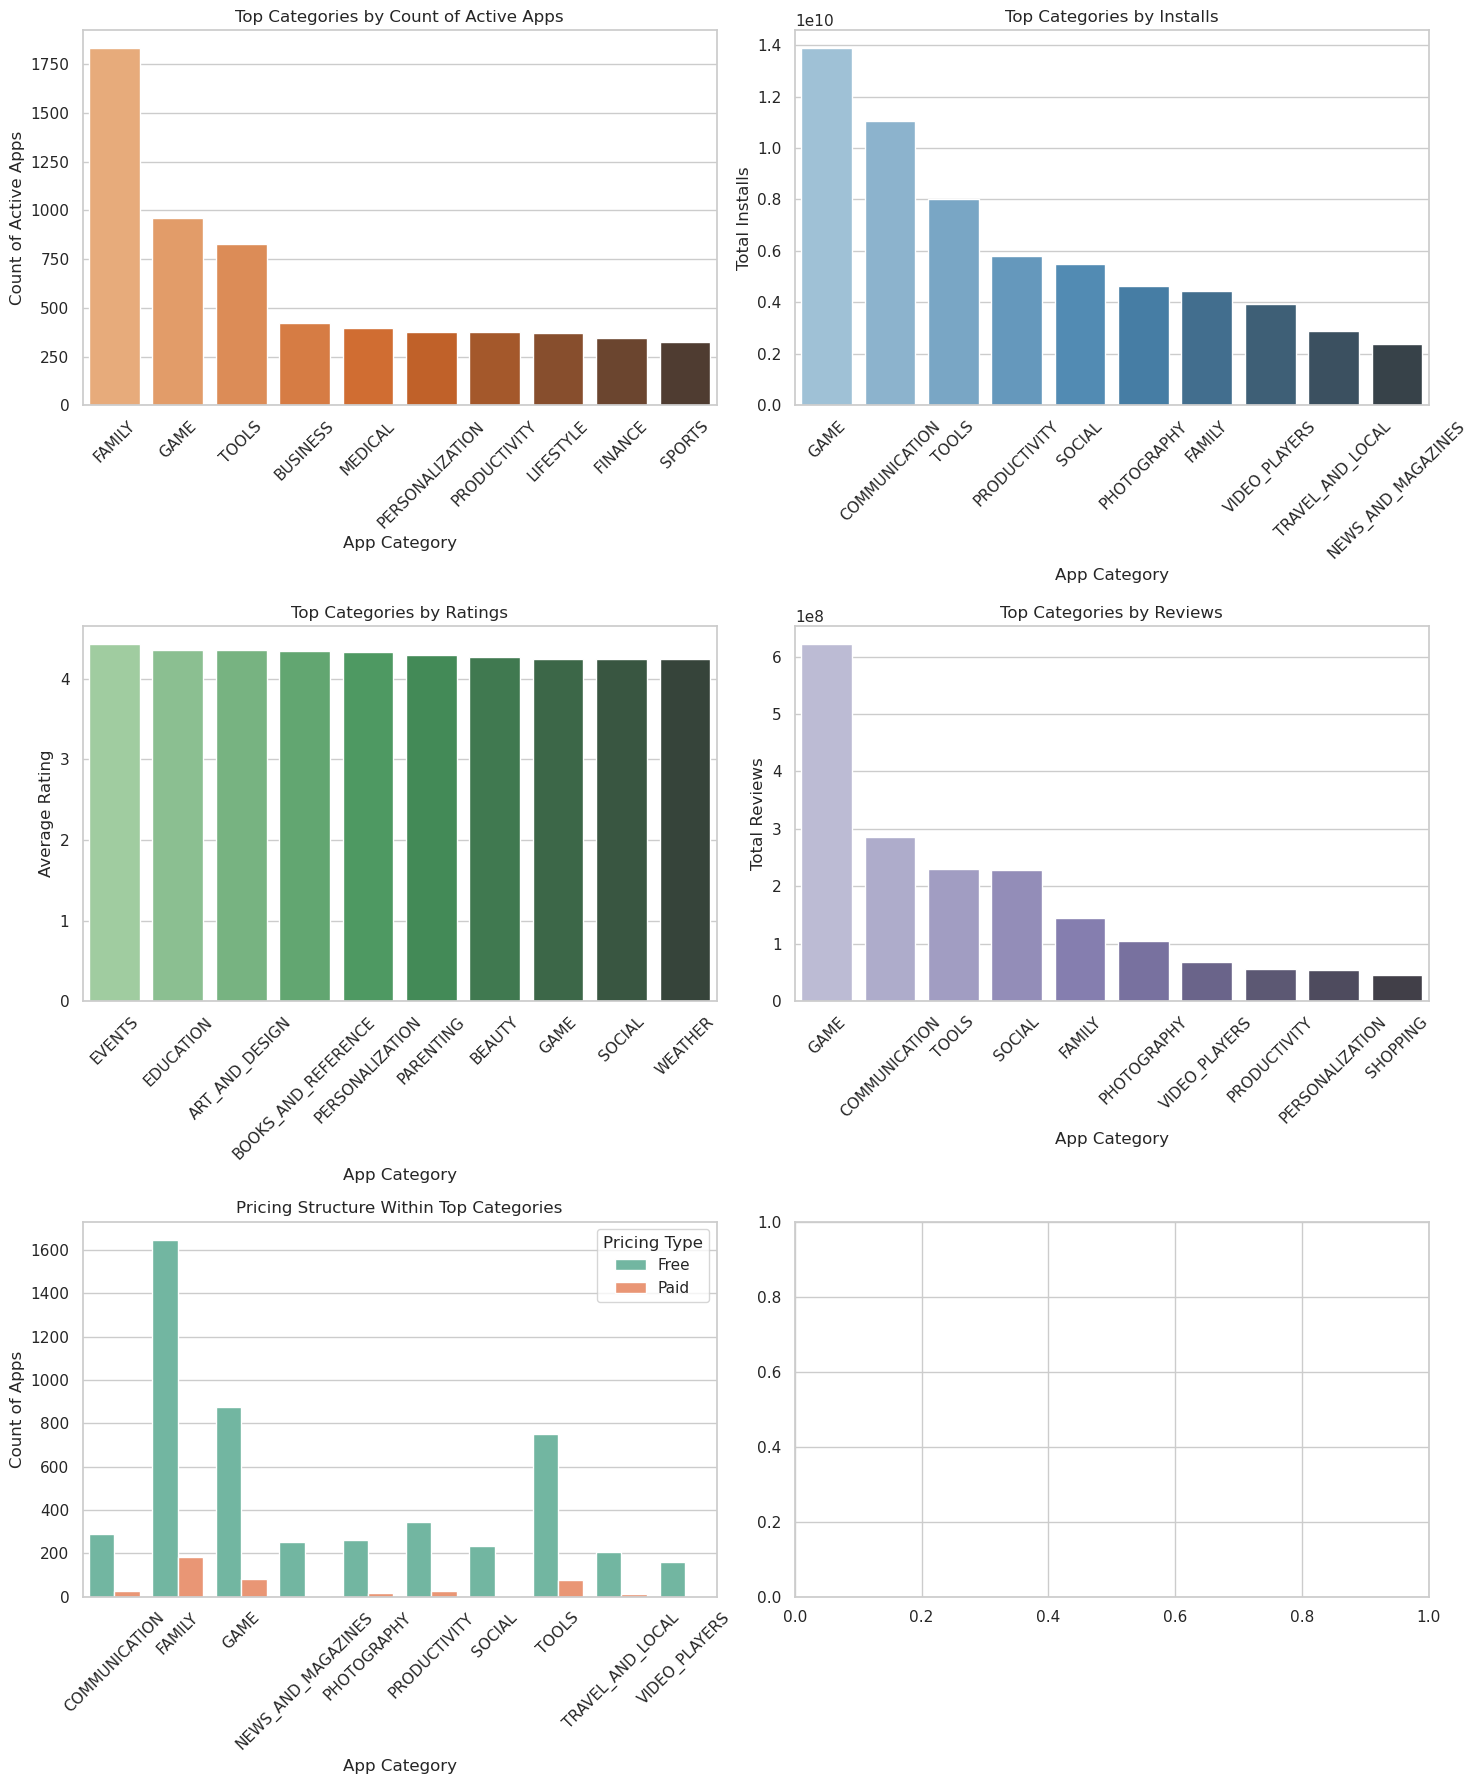

In [49]:
category_count = df_copy['Category'].value_counts().sort_values(ascending=False).head(10)
category_installs = df_copy.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)
category_ratings = df_copy.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10)
category_reviews = df_copy.groupby('Category')['Reviews'].sum().sort_values(ascending=False).head(10)
pricing_counts = df_copy[df_copy['Category'].isin(category_installs.index)].groupby(['Category', 'Type'])['App'].count().reset_index()

# Set Seaborn style
sns.set(style="whitegrid")

# Create subplots using Seaborn
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 18))

# Plot for count of active categories using Seaborn
sns.barplot(x=category_count.index, y=category_count.values, ax=axes[0, 0], palette="Oranges_d")
axes[0, 0].set_title('Top Categories by Count of Active Apps')
axes[0, 0].set_xlabel('App Category')
axes[0, 0].set_ylabel('Count of Active Apps')
axes[0, 0].tick_params(axis='x', rotation=45)

# Plot for installs using Seaborn
sns.barplot(x=category_installs.index, y=category_installs.values, ax=axes[0, 1], palette="Blues_d")
axes[0, 1].set_title('Top Categories by Installs')
axes[0, 1].set_xlabel('App Category')
axes[0, 1].set_ylabel('Total Installs')
axes[0, 1].tick_params(axis='x', rotation=45)

# Plot for ratings using Seaborn
sns.barplot(x=category_ratings.index, y=category_ratings.values, ax=axes[1, 0], palette="Greens_d")
axes[1, 0].set_title('Top Categories by Ratings')
axes[1, 0].set_xlabel('App Category')
axes[1, 0].set_ylabel('Average Rating')
axes[1, 0].tick_params(axis='x', rotation=45)

# Plot for reviews using Seaborn
sns.barplot(x=category_reviews.index, y=category_reviews.values, ax=axes[1, 1], palette="Purples_d")
axes[1, 1].set_title('Top Categories by Reviews')
axes[1, 1].set_xlabel('App Category')
axes[1, 1].set_ylabel('Total Reviews')
axes[1, 1].tick_params(axis='x', rotation=45)

# Plot for pricing structure within top categories using Seaborn
sns.barplot(x='Category', y='App', hue='Type', data=pricing_counts, ax=axes[2, 0], palette="Set2")
axes[2, 0].set_title('Pricing Structure Within Top Categories')
axes[2, 0].set_xlabel('App Category')
axes[2, 0].set_ylabel('Count of Apps')
axes[2, 0].tick_params(axis='x', rotation=45)
axes[2, 0].legend(title='Pricing Type')

plt.tight_layout()
plt.show()

Here's a concise summary along with recommendations based on the analysis:

- Active Apps Count: "Family, Games, and Tools are the most popular categories in terms of active app counts, suggesting strong user engagement and competition."

- Installs: "Games, Family, and Tools exhibit the highest number of installs, indicating their popularity among users."

- Ratings: "Events boasts the highest average ratings, while Games also stand out among highly rated categories."

- Reviews: "Games receive the most reviews, showcasing active user involvement, followed by Family and Tools."

- Pricing Structure: "People prefer free apps over paid ones, with Family leading the free category usage, followed by Games and Tools."

Considering the insights gained from the analysis, the company should strongly consider the Family and Games categories for the new app launch. Develop an app that provides an engaging experience, aligning with user preferences while being prepared to face competition. To monetize effectively, adopt a freemium model within the Family category to maximize user adoption and satisfaction.

## identify the best time to launch a new app

To identify the best time to launch a new app on the Google Play Store, we can analyze various features that could affect app performance and user engagement at different times. \
Here's how we can approach this task and the features we might consider analyzing:

- Features to Analyze:
1. Last Updated: Analyze the distribution of app updates over time to understand if there are certain periods when app updates are more frequent.

2. Category and Genre: Explore whether specific app categories or genres exhibit higher user engagement during certain times.

3. Installs: Analyze the number of app installs over time to identify trends in user adoption during different periods.

4. Ratings and Reviews: Examine how app ratings and reviews change over time, which can indicate user satisfaction and engagement.

5. Content Updates: Study how frequently app content (e.g., descriptions, images) is updated and whether this impacts user engagement.

6. Day of the Week: Analyze app performance on different days of the week to identify potential patterns of higher user engagement.

- Data Visualizations:
1. Time Series Plots: Use line plots or area plots to visualize trends in metrics like app installs, ratings, and reviews over time. This can help identify peak periods of user engagement.

2. Heatmaps: Create heatmaps to visualize the distribution of app updates, installs, or user engagement across different days of the week and months.

3. Bar Charts by Month/Day: Use bar charts to compare metrics like installs, ratings, and reviews on a monthly or daily basis to identify potential patterns.

4. Box Plots by Category/Genre: Employ box plots to compare user engagement metrics across different app categories or genres to identify trends specific to each.

5. Histograms: Use histograms to analyze the distribution of app updates or user engagement metrics to find patterns or outliers.

6. Correlation Matrix: Create a correlation matrix to understand the relationships between app performance metrics and time-related factors.

- Recommendations:
1. Analyze app performance trends over time to identify the most favorable periods for launching or updating the app.

2. Consider launching the app during periods of higher user engagement, such as days of the week or months when installs, ratings, and reviews are higher.

3. Monitor app categories or genres that exhibit increased user engagement during specific times and align your launch with those periods.

4. Regularly update app content and features to maintain user interest and engagement, potentially leading to more successful launches.

5. Take into account trends in user behavior and preferences when planning the launch timeline, keeping in mind the cyclical nature of app engagement.

6. By analyzing these features and presenting the findings through data visualizations, the marketing research firm can make informed recommendations on the optimal timing for launching a new app on the Google Play Store.

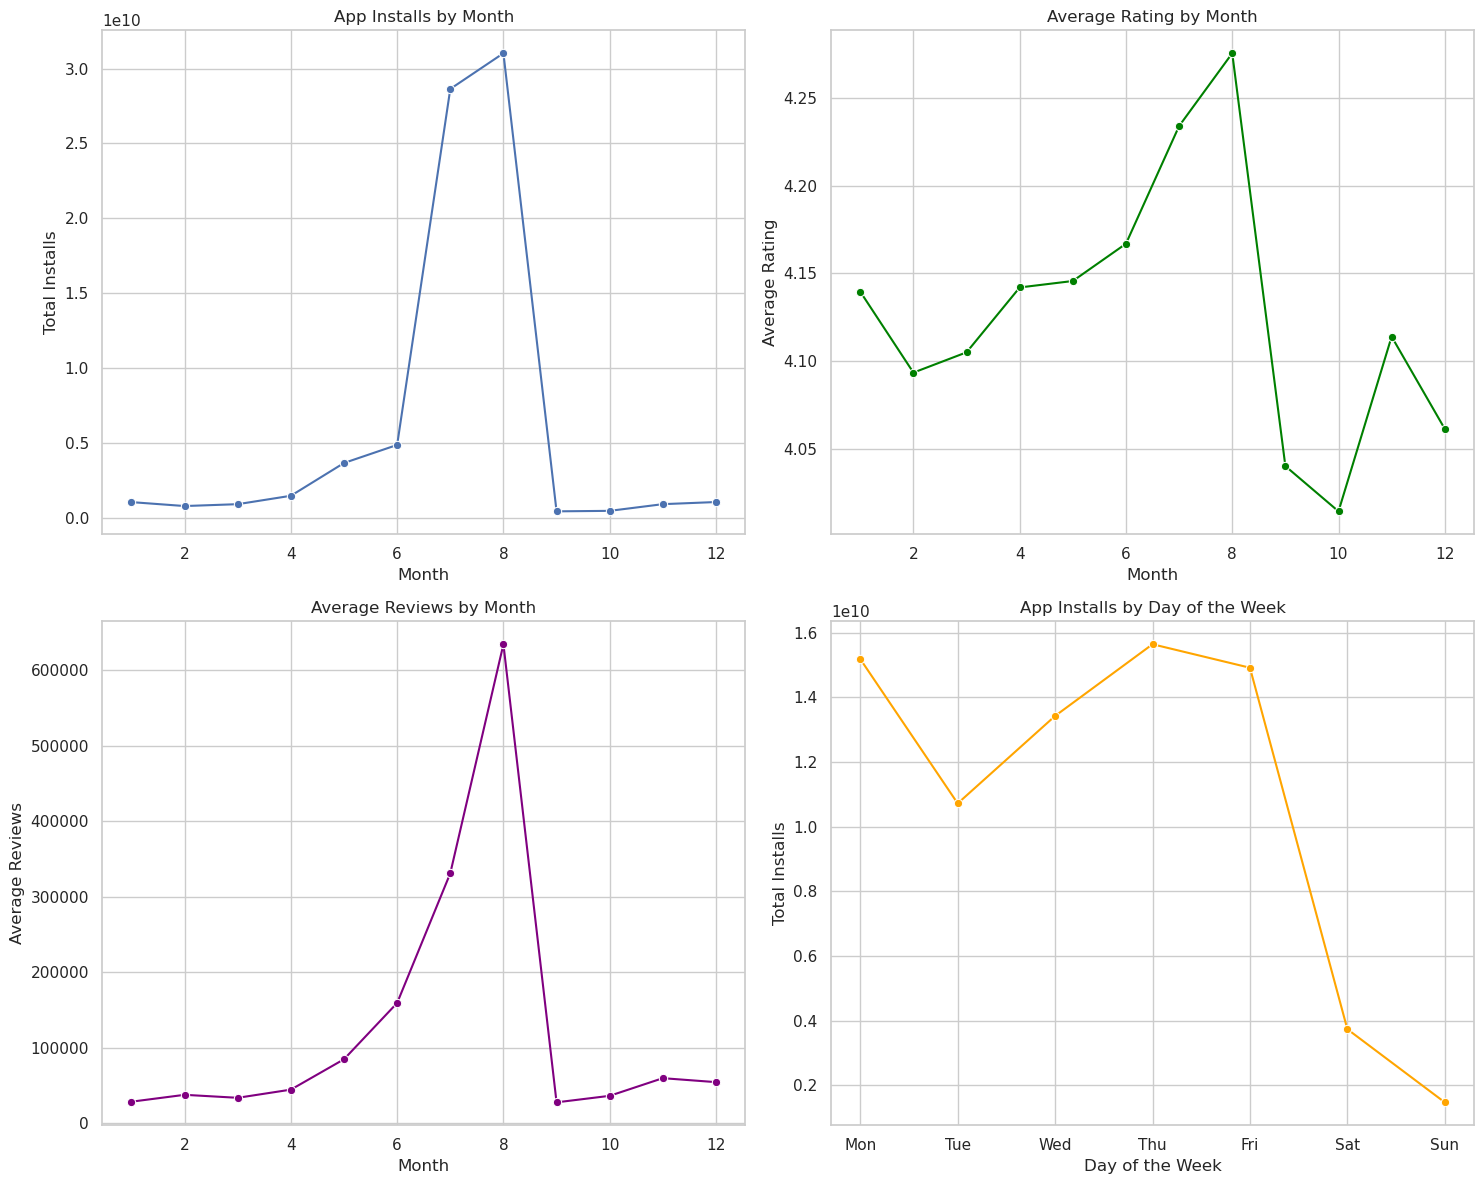

In [50]:
# Extract day of the week from 'Last Updated'
df_copy['DayOfWeek'] = df_copy['Last Updated'].dt.dayofweek

# Calculate metrics for each month and day of the week
month_metrics = df_copy.groupby('Month').agg({
    'Installs': 'sum',
    'Rating': 'mean',
    'Reviews': 'mean'
}).reset_index()

day_metrics = df_copy.groupby('DayOfWeek').agg({
    'Installs': 'sum',
    'Rating': 'mean',
    'Reviews': 'mean'
}).reset_index()

# Set Seaborn style
sns.set(style="whitegrid")

# Create subplots for each metric
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

# Plot for Installs by Month using Seaborn
sns.lineplot(data=month_metrics, x='Month', y='Installs', marker='o', ax=axes[0, 0])
axes[0, 0].set_title('App Installs by Month')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Total Installs')

# Plot for Average Rating by Month using Seaborn
sns.lineplot(data=month_metrics, x='Month', y='Rating', marker='o', color='green', ax=axes[0, 1])
axes[0, 1].set_title('Average Rating by Month')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Average Rating')

# Plot for Average Reviews by Month using Seaborn
sns.lineplot(data=month_metrics, x='Month', y='Reviews', marker='o', color='purple', ax=axes[1, 0])
axes[1, 0].set_title('Average Reviews by Month')
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Average Reviews')

# Plot for Installs by Day of the Week using Seaborn
sns.lineplot(data=day_metrics, x='DayOfWeek', y='Installs', marker='o', color='orange', ax=axes[1, 1])
axes[1, 1].set_title('App Installs by Day of the Week')
axes[1, 1].set_xlabel('Day of the Week')
axes[1, 1].set_ylabel('Total Installs')
axes[1, 1].set_xticks(range(7))
axes[1, 1].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

plt.tight_layout()
plt.show()

Insights and Conclusions:

- App Installs Trend: The highest app installs occur between months 6 (June) and 7 (July), with a peak in the 7th month. This period might indicate increased user engagement and adoption.

- Average Rating Peak: The average rating reaches its highest point between months 6 (June) and 8 (August), peaking in the 8th month. This suggests that users might be more satisfied during these months.

- Average Reviews Surge: Highest average reviews are observed between months 6 (June) and 8 (August), with the peak in the 8th month. This indicates a higher level of user engagement and interaction.

- Day of the Week: App installs are notably higher on Thursdays, indicating a potential preference for downloading and installing apps toward the end of the week.

Recommendation to the Company:

- Based on the analysis, the company should consider launching the new app between the months of June and August to align with peak periods of user engagement, high ratings, and active user reviews. Furthermore, launching the app on a Thursday could potentially maximize initial installs and user interest.

## Final Report:

- Most of the apps are free so developers should focus on creating free apps to have a huge customer base. 
- If developing paid apps then apps size should not be greater than 40mb. 
- More Apps should be in the category like Events,Beauty,Parenting as they have not been explored much but still quite popular with huge installations. 
- In order to retain the customer base apps should be updated regularly Developers should develop apps such that their content is available for everyone. 
- Bulky apps should be developed in the category like Game, Family.
- If developing paid apps then its price should not be high and size should be less than 20mb. 

1. Percentage of free apps = ~92%
2. Most competitive category: Family
3. Category with the highest number of installs: Game
4. Category with the highest average app installs: Communication
5. Percentage of apps that are top rated = ~80%
6. The median size of all apps in the play store is 12 MB.
7. The apps whose size varies with device has the highest number average app installs.
8. The apps whose size is greater than 90 MB has the highest number of average user reviews, i.e., they are more popular than the rest.